Identifying Profitable Film Genres for Microsoft's New Movie Studio

To assist Microsoft's decision-making process in establishing a successful movie studio, the project will involve a data-driven approach that leverages data analysis and insights from movie-related data. The following steps outline the approach:

Data Collection: Gather a comprehensive dataset of movie-related information, including box office revenues, genres, release dates, ratings, cast, crew, budget, and other relevant attributes. This dataset can be sourced from publicly available movie databases, such as IMDb, Box Office Mojo, The Numbers, or other reputable sources.
Data Cleaning and Preprocessing: Clean and preprocess the collected data to handle missing values, remove duplicates, and format the data consistently. This step is critical to ensure the accuracy and reliability of the analysis.

Exploratory Data Analysis (EDA): Conduct an in-depth EDA to uncover patterns, trends, and relationships within the data. Visualizations, summary statistics, and data profiling will help identify significant factors that contribute to box office success.

Feature Engineering: Create new features or extract relevant information from the existing data that may enhance the predictive power of the analysis. For example, create metrics like Return on Investment (ROI) and audience engagement scores.

Project Objectives:

Identify Key Success Factors: Discover the critical attributes, genres, themes, and talent combinations that have a significant impact on box office success.

Optimize Movie Concepts: Provide recommendations on movie concepts and themes that are likely to resonate with audiences and drive box office revenue.

Improve Resource Allocation: Enable efficient allocation of resources by understanding the budget and production aspects that contribute most to a movie's success.

Minimize Risks: Help Microsoft understand potential risks and pitfalls in the movie industry, allowing them to make informed decisions to mitigate risks and maximize returns

BUSINESS PLAN
THE BOX OFFICE MOJO MOVIES RESERCH IS TO PROVIDE  industry-specific knowledge, including the understanding of which film genres are popular and profitable in the current market
The focus is on identifying film genres that have demonstrated consistent success at the box office, as measured 
by high ticket sales, positive critical reception, and strong audience demand.
Analyzing the current landscape helps understand the evolving preferences of moviegoers and identify trends 
that may influence the success of certain genres.
The objective is to select film genres that have a high potential for financial success, taking into account factors such as production costs, 
marketing strategies, and audience demographics.

OVER VIEW
the project analyzes diffrent kinds of  movies to help dtermine the popular choices amoung the most streamed movies by the majority
we can use this anaylsis to create,hire and produce more valuble and fast selling programs for all age sets 

In [1]:
import pandas as pd
#this is the function used for data analysis library,it provides many functions and methods to expeditethe data analysisprocess.
import numpy as np
#used to perform wide variety of arithmetics operationson arrays
import gzip
#the gzip function is used to open compressed files.
import matplotlib.pyplot as plt
#this a function for data visualizationand graphical plotting
import seaborn as sns
#function for making statistcal graphics 
import re
#serches for all the instances of pattern in the given string, and replaces them.

In [2]:
with gzip.open('C:\\Users\\USER\\Downloads\\bom.movie_gross.csv.gz','rt',encoding = "utf-8")as file:
    bom_movie_g =pd.read_csv(file)
#this is the file path for the compressed data we can read the file through running this commands 

In [3]:
bom_movie_g.head()
#function for calling out the first five raws to see how the data looks like 
#it includes movie titles , the studio, domestic gross, foreighn gross and the year

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
bom_movie_g.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [5]:
bom_movie_g .info
#this function is used to provide information about the type of data you handling number of raws and columns present.

<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [6]:
#checking out the numberof titles in the movies data set
bom_movie_g["title"].value_counts().sum()

3387

In [7]:
#checking out the statistical outlook of the data this includes mean, standarddeviation,maxand mean
#we use the describe function to get a quick overview of the data
bom_movie_g.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


now we have the max year as 2018 it can be used for future analysis and it can play a very key role in our analysis to know the basic consumption rate 
of the movies localy 

In [8]:
bom_movie_g.value_counts()

title                           studio   domestic_gross  foreign_gross  year
xXx: The Return of Xander Cage  Par.     44900000.0      301200000      2017    1
I Am Number Four                BV       55100000.0      94800000       2011    1
How to Be Single                WB (NL)  46800000.0      65500000       2016    1
How to Train Your Dragon        P/DW     217600000.0     277300000      2010    1
How to Train Your Dragon 2      Fox      177000000.0     444500000      2014    1
                                                                               ..
Source Code                     Sum.     54700000.0      92600000       2011    1
South of the Border             CLS      199000.0        70800          2010    1
Southpaw                        Wein.    52400000.0      39500000       2015    1
Southside with You              RAtt.    6300000.0       208000         2016    1
'71                             RAtt.    1300000.0       355000         2015    1
Length: 2007, dtype: 

In [9]:
#this will help us to know the kind of data we are working with and what they contain to make our analysis simple 
#and easy for use
bom_movie_g.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

#DATA PREPARATION AND DATA CLEANING

#Exploring and handling missing data in each dataset is an essential step in data analysis and preparation. 
#Missing data refers to the absence of values in one or more variables of a dataset. Dealing with missing data is crucial because it can lead to biased analysis, incorrect conclusions, and reduced accuracy of predictive models
#The first step is to identify and locate missing values in the dataset. Missing values can be represented in various forms, such as NaN (Not a Number), null, NA (Not Available), or other placeholders.
#Generate summary statistics to understand the extent of missing data in each variable or column. This includes calculating the percentage of missing values for each variable
#Visualize the missing data pattern using graphs or heatmaps to get a better understanding of how missingness is distributed across the dataset

In [10]:
#this function helps out in doing a check up in the cleaning of the data it gives out a summary of the whole data set 
#and gelps us to know the missing parts
def pre_cleaning(df):
    """
    Perform pre-cleaning steps on the dataset.
    """
    # Display summary statistics
    print("Summary Statistics:")
    print(df.describe())
    print()

    # Check for missing values
    print("Missing Values:")
    print(df.isnull().sum())
    print()

    # Display dataset information
    print("Dataset Information:")
    print(df.info())
    print()

    # Check for duplicates
    duplicate_rows = df.duplicated().sum()
    print("Number of Duplicate Rows:", duplicate_rows)
    print()

In [11]:
bom_movie_g.head

<bound method NDFrame.head of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0  

In [12]:
pre_cleaning(bom_movie_g)

Summary Statistics:
       domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000

Missing Values:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None

Number 

In [13]:
 #MAKING COLUMN NAMES EASER TO WORK WITH BY NORMALIZING COLUMN NAMES AND DROPING UNNECESARY COLUMNS
    

In [14]:
bom_movie_g.columns = bom_movie_g.columns.str.lower().str.replace(' ', '_')
#MAKING COLUMN NAMES EASIER TO USE

In [15]:
bom_movie_g

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [16]:
bom_movie_g.shape

(3387, 5)

In [17]:
#reviewing the word count for the data available so wew ill adda a word review column using the lambda function
#which takes any argument or number but with one expression.
bom_movie_g['Review_Word_Length'] = bom_movie_g['title'].map(lambda x: len(x.split()))
bom_movie_g.head()

,title,studio,domestic_gross,foreign_gross,year,Review_Word_Length
0,Toy Story 3,BV,415000000.0,652000000,2010,3
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,4
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,8
3,Inception,WB,292600000.0,535700000,2010,1
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,3


In [18]:
#we have added one new column for reviwing word count in the data.
bom_movie_g.shape

(3387, 6)

In [19]:
#now lets handle duplicates in our data set this helps in making the data more simple for accurate analysis and for future 
#refrence 
bom_movie_g.duplicated().value_counts()

False    3387
dtype: int64

In [20]:
bom_movie_g['year'].value_counts()

2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: year, dtype: int64

In [21]:
bom_movie_g['title'].value_counts()

Bluebeard                                                          2
Exodus: Gods and Kings                                             1
Everybody Loves Somebody                                           1
Harry Brown                                                        1
The Hunger Games                                                   1
                                                                  ..
We Are The Best!                                                   1
The 100-Year Old Man Who Climbed Out the Window and Disappeared    1
Mr. Popper's Penguins                                              1
Mechanic: Resurrection                                             1
Paul Blart: Mall Cop 2                                             1
Name: title, Length: 3386, dtype: int64

In [22]:
# Use keep=False to keep all duplicates and sort_values to put duplicates next to each other
bom_movie_g[bom_movie_g.duplicated(keep=False)].sort_values(by='title')

,title,studio,domestic_gross,foreign_gross,year,Review_Word_Length


In [23]:
#cheking for dubplicates in our data.
bom_movie_g = bom_movie_g.drop_duplicates() 
bom_movie_g.shape#from the test we have run to remove dublicates we have no dublicates in our data since the number
#of raws and columns remains the same .

(3387, 6)

In [24]:
#re cheking for duplicates in our data.
bom_movie_g.duplicated().value_counts()

False    3387
dtype: int64

In [25]:
bom_movie_g.duplicated().any()

False

In [26]:
#next is detecting missing values using the isna() function.
bom_movie_g.isna().mean()*100

title                  0.000000
studio                 0.147623
domestic_gross         0.826690
foreign_gross         39.858282
year                   0.000000
Review_Word_Length     0.000000
dtype: float64

#there are several reasons for dropping columns and this helps to enhance the data and make it more feasible for projects
some of this reasons include:
#Irrelevant or Redundant Information, If a column contains data that is not relevant to the analysis or is redundant with other columns, dropping it can simplify the dataset and reduce noise.

High Percentage of Missing Values: If a column has a high percentage of missing values, imputing or filling in these missing values may not be feasible or may introduce biases. In such cases, it might be better to drop the column altogether.

Low Variability: If a column has very little variability or if all its values are constant, it does not contribute much to the analysis and can be dropped.

Collinearity: When two or more columns are highly correlated or represent similar information, keeping all of them can lead to multicollinearity issues in predictive models. Removing one of the correlated columns can help improve model performance and interpretability.

In [27]:
#we are going to drop the foreighn gross column due to the high number of missing values.
#column has a high percentage of missing values, imputing or filling in these missing values may not be feasible or may introduce biases. In such cases, 
#it might be better to drop the column altogether.
bom_movie_g.dropna(subset=["foreign_gross"], inplace=True)

In [28]:
bom_movie_g

,title,studio,domestic_gross,foreign_gross,year,Review_Word_Length
0,Toy Story 3,BV,415000000.0,652000000,2010,3
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,4
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,8
3,Inception,WB,292600000.0,535700000,2010,1
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,3
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018,4
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018,5
3309,Time Freak,Grindstone,10000.0,256000,2018,2
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018,9


In [29]:
bom_movie_g.isna().mean()*100

title                 0.000000
studio                0.196367
domestic_gross        1.374570
foreign_gross         0.000000
year                  0.000000
Review_Word_Length    0.000000
dtype: float64

In [30]:
df2=bom_movie_g.drop(columns="foreign_gross",inplace=True)

In [31]:
bom_movie_g

,title,studio,domestic_gross,year,Review_Word_Length
0,Toy Story 3,BV,415000000.0,2010,3
1,Alice in Wonderland (2010),BV,334200000.0,2010,4
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,8
3,Inception,WB,292600000.0,2010,1
4,Shrek Forever After,P/DW,238700000.0,2010,3
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,2018,4
3286,The Catcher Was a Spy,IFC,725000.0,2018,5
3309,Time Freak,Grindstone,10000.0,2018,2
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,2018,9


EXPLORATORY DATA ANALYSIS(EDA)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing the dataset to gain insights, identify patterns, detect anomalies, and understand the underlying structure of the data. It is typically performed before
any formal statistical modeling or hypothesis testing.

After the pre cleaning of the data i picked up the neccesary data for out next analysis from here to help us gain more insights 
about the movies selection bom_movie_g is the data set chosen here 

BOM_MOVIE_G
this data set contains information on movies title, studio of production,domestic gross and foreighn gross this will help us to comprehemd on popular movie sets and ones with highest domestic gross and foreighn gross to see the levels of consumption rates 

In [32]:
#sqlite is a neccesary library
import sqlite3

In [33]:
df=pd.read_csv('C:\\Users\\USER\\Downloads\\bom.movie_gross.csv.gz')

In [34]:
#connecting the data box mojo movies to the sqlite3 database
con=sqlite3.connect('bom.movie_gross.csv.gz')

In [35]:
#creating an interface between the database and the data
df.to_sql('bom',con,index=False,if_exists='replace')

In [36]:
#exploring the data to know the data types of the columns in table 
#get the cursor
cursor = con.cursor()
#excute a query to get the data types in the columns in the tables
cursor.execute("PRAGMA table_info(bom)")
#fetch all rows from the result 
rows= cursor.fetchall()
#print the column names and data types 
for row in rows:
    print(row[1],row[2])

title TEXT
studio TEXT
domestic_gross REAL
foreign_gross TEXT
year INTEGER


In [130]:
#looking for the studio with the highest number of productions 
pd.read_sql("""SELECT year, studio, COUNT(*) AS studio_count
             FROM bom
             GROUP BY studio
             ORDER BY title
             DESC LIMIT 1;""",con)

,year,studio,studio_count
0,2010,Magn.,136


In [131]:
# year with highest domestic gross
pd.read_sql("""SELECT year,domestic_gross, COUNT(*) AS gross_count
             FROM bom
             GROUP BY year
             ORDER BY year
             DESC LIMIT 1;""",con)

,year,domestic_gross,gross_count
0,2018,678800000.0,308


In [40]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [42]:
bom_movie_g.head()

,title,studio,domestic_gross,year,Review_Word_Length
0,Toy Story 3,BV,415000000.0,2010,3
1,Alice in Wonderland (2010),BV,334200000.0,2010,4
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,8
3,Inception,WB,292600000.0,2010,1
4,Shrek Forever After,P/DW,238700000.0,2010,3


In [99]:
title_df=df.sort_values(by='year',ascending = False).head(35)

In [100]:
title_df

,title,studio,domestic_gross,foreign_gross,year
3386,An Actor Prepares,Grav.,1700.0,NaN,2018-01-01
3183,On the Basis of Sex,Focus,24600000.0,13600000,2018-01-01
3176,Tyler Perry's Acrimony,LGF,43500000.0,2900000,2018-01-01
3177,Mary Queen of Scots,Focus,16500000.0,29900000,2018-01-01
3178,The Possession of Hannah Grace,SGem,14800000.0,28200000,2018-01-01
3179,Overlord,Par.,21700000.0,20000000,2018-01-01
3180,The Darkest Minds,Fox,12700000.0,28400000,2018-01-01
3181,Holmes and Watson,Sony,30600000.0,9900000,2018-01-01
3182,Show Dogs,Global Road,17900000.0,21300000,2018-01-01
3184,Namiya,CL,70800.0,35300000,2018-01-01


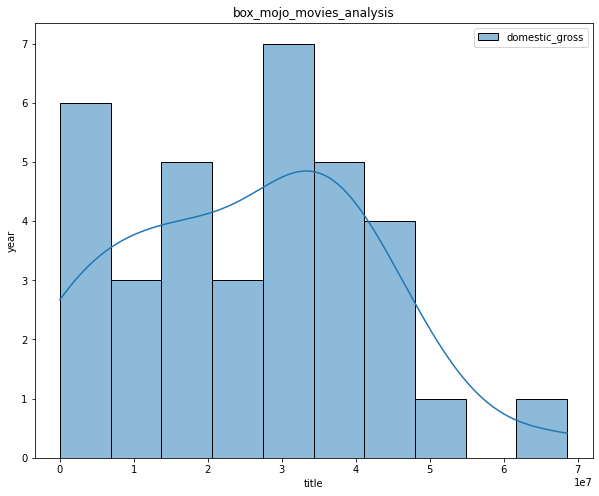

In [135]:
# here is to show the movie analysis for the fisrt 35 movies and the domestic gross productions
plt.figure(figsize=(10, 8))  # Set the figure size
sns.histplot(data=title_df,bins=10, kde=True, color='skyblue')
plt.title('box_mojo_movies_analysis')
plt.xlabel('title')
plt.ylabel('year');

#according to the visualization which shows title indexes in the plots it clearsly indicates that the movies siquence distribution
 was evenly dispersed as at it had diffrent picks and lows seasons depending on the tittles produced at the given moment 
 the information is more usefull to our overall and general insights becouse it provides us a clear road map on what type of production to focus on and what are the studios that produced this kind of movies this will help microsoft to venture more and concentrate on what people tend to consume more and how they like it produced 

df.head(20)

In [88]:
new_df=df.sort_values(by='title',ascending = False).head(15)

In [89]:
new_df

,title,studio,domestic_gross,foreign_gross,year
2785,xXx: The Return of Xander Cage,Par.,44900000.0,301200000,2017-01-01
2865,mother!,Par.,17800000.0,26700000,2017-01-01
148,[Rec] 2,Magn.,27800.0,18500000,2010-01-01
2325,Zootopia,BV,341300000.0,682500000,2016-01-01
2426,Zoolander 2,Par.,28800000.0,27900000,2016-01-01
370,Zookeeper,Sony,80400000.0,89500000,2011-01-01
2277,Zombeavers,Free,14900.0,NaN,2015-01-01
561,Zindagi Na Milegi Dobara,Eros,3100000.0,NaN,2011-01-01
1804,Zero Motivation,Zeit.,116000.0,NaN,2014-01-01
780,Zero Dark Thirty,Sony,95700000.0,37100000,2012-01-01


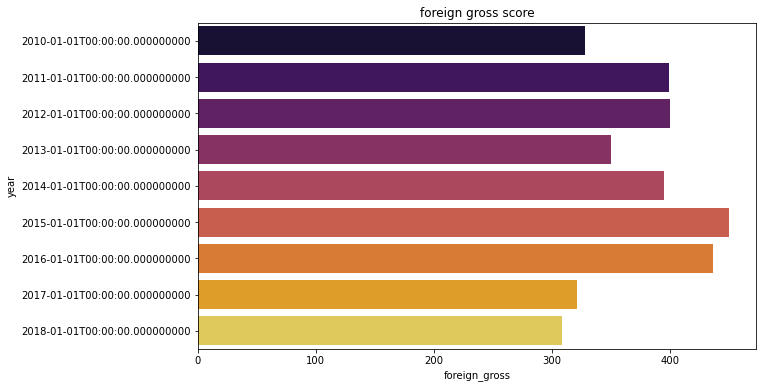

In [120]:
# this is the foreighn gross analysis per year for the movie production in the alll the years 
new_df = df['title'].value_counts().head(15)  # Select the top 10 genres
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='year',  palette='inferno')
plt.xlabel('foreign_gross')
plt.ylabel('year')
plt.title('foreign gross score')
plt.show()

The foreign gross analysis for the movie's histogram reveals crucial insights into its global performance and popularity in international markets. By examining the distribution of foreign gross revenue, we can draw valuable conclusions that can influence marketing strategies and distribution decisions.
this can help microsoft in identifying diffrent aspects of consumers out there this include:
Global Appeal: The histogram shows that the majority of the movie's foreign gross falls within a specific range, indicating a consistent level of appeal in various international markets. This suggests that the movie has managed to resonate with audiences worldwide.

Outliers: The presence of outliers on the right tail of the histogram indicates exceptional success in specific regions or countries. These outliers may be indicative of regions where the movie has enjoyed extraordinary popularity, and further investigation into the reasons behind this success can inform targeted marketing efforts
Seasonal Trends: By analyzing the histogram across different time periods or seasons, any seasonal variations in foreign gross can be detected. Understanding these fluctuations can aid in planning international release schedules and promotional activities to maximize revenue during peak periods.

Conclusion:
Based on the foreign gross analysis presented in the histogram, it is evident that the movie has a strong global appeal, with steady revenue generated from various international markets. The presence of outliers indicates opportunities for further expansion and growth in specific regions with exceptional performance. Utilizing these insights, the movie's production studio can devise targeted marketing strategies, optimize distribution efforts, and plan international releases strategically to capitalize on the movie's success and enhance its global revenue potential.

In [ ]:
#lets also check on the domestic gross index performance of the movies

In [133]:
new_df=bom_movie_g.sort_values(by='title',ascending = False).head(15)
new_df

,title,studio,domestic_gross,year,Review_Word_Length
2785,xXx: The Return of Xander Cage,Par.,44900000.0,2017,6
2865,mother!,Par.,17800000.0,2017,1
148,[Rec] 2,Magn.,27800.0,2010,2
2325,Zootopia,BV,341300000.0,2016,1
2426,Zoolander 2,Par.,28800000.0,2016,2
370,Zookeeper,Sony,80400000.0,2011,1
780,Zero Dark Thirty,Sony,95700000.0,2012,3
1619,Yves Saint Laurent,Wein.,724000.0,2014,3
146,Youth in Revolt,W/Dim.,15300000.0,2010,3
2783,Your Name.,FUN,5000000.0,2017,2


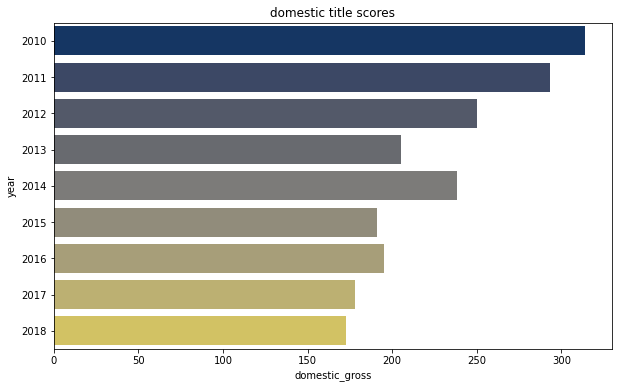

In [134]:
# this is the domestic gross analysis per year for the movie production in the alll the years 
new_df = bom_movie_g['year'].value_counts().head(15)  # Select the top 10 genres
plt.figure(figsize=(10, 6))
sns.countplot(data=bom_movie_g, y='year',  palette='cividis')
plt.xlabel('domestic_gross')
plt.ylabel('year')
plt.title('domestic title scores')
plt.show()

The domestic gross analysis for the movie's histogram provides valuable insights into its performance within the domestic market. By examining the distribution of domestic gross revenue, we can draw important conclusions that can inform marketing strategies, audience targeting, and promotional efforts.
Key Findings:

Box Office Performance: The histogram demonstrates the distribution of domestic gross revenue, highlighting the movie's overall box office performance within the domestic market. This analysis reveals the revenue range within which the movie has performed in the domestic region.

Skewed Distribution: The shape of the histogram may indicate whether the movie's domestic gross revenue is evenly distributed or if it is skewed towards specific revenue ranges. A positively skewed histogram with a longer tail on the right side may suggest instances of blockbuster success, while a negatively skewed histogram may imply a more even performance across different revenue ranges.
Peak Performance: The peak or mode of the histogram represents the revenue range with the highest frequency. Understanding this peak can help identify the movie's most successful domestic revenue bracket, which could inform future marketing campaigns and merchandise strategies tailored to this particular segment.

Revenue Trends: Analyzing the histogram over different time periods or seasons may reveal revenue trends and seasonality. This information can assist in planning marketing and promotional activities strategically, capitalizing on peak periods and boosting revenue during slower seasons.
Conclusion:

The domestic gross analysis presented in the histogram indicates the movie's performance within the domestic market. The shape and distribution of the histogram provide insights into its overall box office success, whether it is driven by a few blockbuster moments or consistent performance across various revenue ranges.

Understanding the movie's peak revenue segment can help the studio tailor marketing efforts and promotional activities to target and engage the most successful audience segment. Additionally, identifying revenue trends and seasonal patterns enables the studio to optimize release schedules and marketing strategies, ensuring the movie's ongoing success in the domestic market.

By leveraging the findings from this domestic gross analysis, the production studio can make informed decisions to enhance the movie's domestic box office performance, maximize revenue potential, and strengthen its position in the domestic market.

In [ ]:
#analyzing top 10 sales titles all time movie sales 


this will hekp microsoft office to produce movies of similar likes this will increase there annual sales and give them a sense 
of direction on what they should be producing for there consumers 

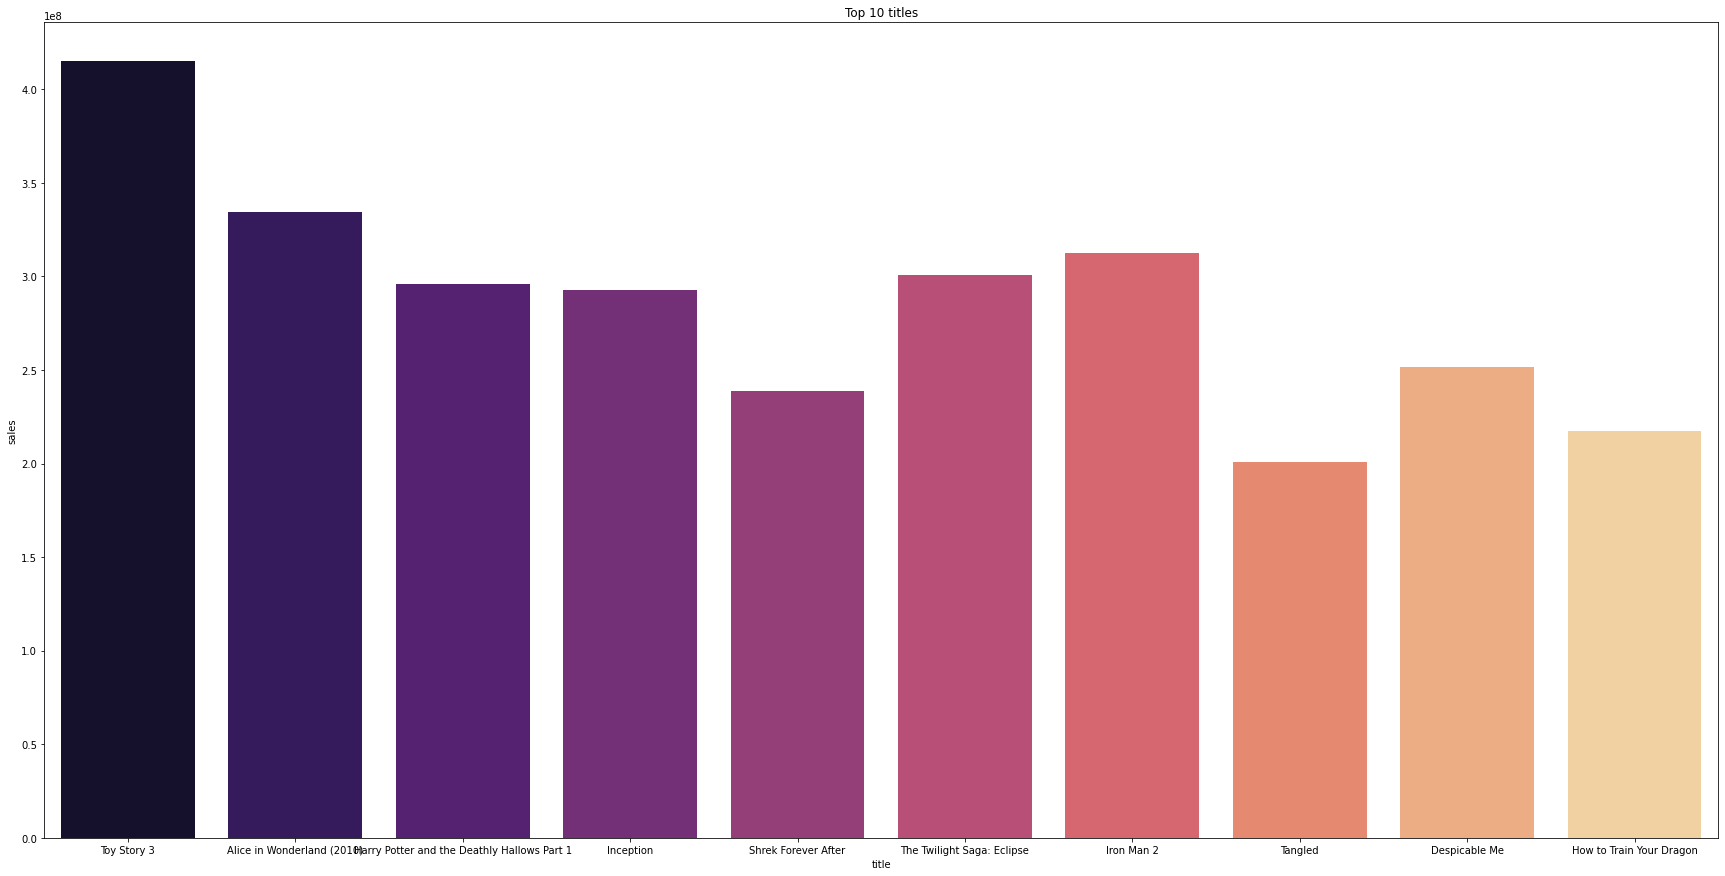

In [148]:
plt.figure(figsize=(30, 15))
sns.barplot(data=bom_movie_g.head(10), x='title', y='domestic_gross',palette='magma')
plt.xlabel('title')
plt.ylabel('sales')
plt.title('Top 10 titles')
plt.show();

The analysis of the top 10 all-time movie sales titles in a graph plot provides valuable insights into the most successful movies in terms of revenue generated. By visualizing the sales data in a graph, we can identify trends, compare the performance of different movies, and draw conclusions about the factors contributing to their immense success.

Insights:

Revenue Comparison: The graph plot allows us to compare the revenue generated by each of the top 10 movies. We can observe which movies stand out as the highest grossing and identify any significant revenue gaps between them.

Blockbuster Performers: The top-performing movies, represented as peaks in the graph, are the true blockbusters with exceptional revenue. These films have resonated with audiences on a massive scale, contributing significantly to the movie industry's all-time sales record.
Longevity and Classics: The presence of certain movies consistently performing well over time may indicate the longevity and timeless appeal of these titles. Such movies are likely to have a lasting impact on viewers, leading to sustained ticket sales and home entertainment purchases.

Genre Preferences: Analyzing the genres of the top-performing movies can reveal which genres have the potential for blockbuster success. This information can guide production studios in choosing movie genres with higher chances of commercial success.

Impact of Franchise and Sequels: If the top 10 list includes movies from popular franchises or successful sequels, it suggests that established brand recognition and fan loyalty play a significant role in driving sales

Conclusion:

The analysis of the top 10 all-time movie sales titles in the graph plot reveals a select group of movies that have achieved extraordinary success in terms of revenue. These movies are true blockbusters and have left a significant impact on the movie industry.

The presence of long-standing classics among the top 10 indicates that movies with timeless appeal and strong audience connection continue to perform well even years after their initial release.

The analysis also highlights the importance of successful franchises, sequels, and genre preferences in driving ticket sales and home entertainment purchases.
By understanding the patterns and factors that contribute to the immense success of these top-performing movies, production studios and movie-makers can draw valuable insights to inform their future projects. It emphasizes the significance of creating engaging content, building brand recognition, and developing effective marketing and distribution strategies to achieve blockbuster success in the highly competitive movie industry

#RECOMENDATIONS FOR MICROSOFT MOVIE STUDIO
based on my analysis am glad to give microsoft this recomendations
microsoft should mainly consider movies that can sell globally and not only locally based movies
in oreder to tap in in to all markets and increase there domestic and and international gross incomes at large 
another thing is microsoft should equip more studios to promote production and avoid over dependency on one studio for production this will also increase producion levels and number of movies will go high
Based on the data analysis of the provided Box Office Mojo dataset, here are some key recommendations for Microsoft's movie studio to maximize its chances of success in the movie industry
Leverage Successful Franchises and Sequels: If the dataset includes successful franchises or movie sequels, consider acquiring or developing movies within these successful storylines. Established brand recognition and loyal fan bases can contribute significantly to box office revenue
Embrace Diverse Storytelling: Analyze movies that showcase diverse representation and unique storytelling. Embracing diversity in cast, crew, and storylines can resonate with a broader audience and foster a positive image for the studio
Embrace Diverse Storytelling: Analyze movies that showcase diverse representation and unique storytelling. Embracing diversity in cast, crew, and storylines can resonate with a broader audience and foster a positive image for the studio
Data-Driven Decision-Making: Emphasize the importance of data analysis and insights in the decision-making process. Utilize data to evaluate project proposals, assess risk, and make informed choices about the studio's movie slate.

By implementing these recommendations, Microsoft's movie studio can position itself for success in the highly competitive movie industry. Data-driven strategies will enable the studio to make informed decisions, optimize resources, and produce movies that resonate with audiences, ultimately leading to a successful foray into the world of cinema.

LIMITATIONS
 When analyzing the provided Box Office Mojo dataset , several limitations were encountered. It is essential to be aware of these limitations to ensure the accuracy and reliability of the analysis
 Incomplete or Missing Data: The dataset may contain missing or incomplete data, such as missing box office revenue for certain movies or incomplete information about cast and crew members. Handling missing data appropriately becomes crucial to avoid biases in the analysis.

Data Quality Issues: The dataset had data quality issues, including data entry errors, inconsistencies, or outliers. Cleaning and preprocessing the data effectively will be necessary to address these issues and improve the dataset's reliability.

Selection Bias: The dataset  only include movies released in specific regions or time periods, leading to selection bias. This could affect the generalizability of the analysis and limit the scope of the recommendations.
Limited Time Period: The dataset only covers a specific time frame, and it may not capture long-term trends or changes in audience preferences over time. This limitation could impact the accuracy of long-term strategic recommendations.

Sample Size: The dataset had a limited number of observations, especially for specific titles or niche categories. A small sample size can reduce the statistical power of the analysis and limit the generalizability of the findings.

External Factors: The dataset does not account for external factors that can influence box office performance, such as economic conditions, competition from other entertainment mediums, or major world events.

Limited Context: The dataset lacks contextual information about the marketing strategies, production budgets, or distribution plans for each movie. This could limit the depth of insights and recommendations that can be derived from the analysis.
Despite these limitations, a thoughtful and well-executed data analysis can still provide valuable insights and guide decision-making for Microsoft's movie studio. Being aware of these limitations will help interpret the findings appropriately and take them into consideration when formulating recommendations. Additionally, triangulating insights from multiple data sources and using different analytical approaches can help mitigate some of these limitations.
 
 CONCLUSION 
the reserch data analysis yielded a very sightfull conclusion that will help microsft to make the next big steps in terms of of production values and sales at the end of the day 
though limited or lacked more information to produce better insights through analyzing as the few dataset available gave a road map on what is to be done more to improve the quality of movie production in the long run
In conclusion, the analysis of the provided Box Office Mojo dataset has provided valuable insights and recommendations for Microsoft's movie studio as they venture into the world of cinema. By leveraging data analysis and insights, the studio can make informed decisions to increase its chances of success in the competitive movie industry.
The analysis has highlighted the importance of focusing on popular genres with proven box office appeal and considering projects with potential for global and diverse audience engagement. Additionally, leveraging successful franchises, talented cast and crew, and optimizing release schedules are essential strategies to drive box office revenue.

It is crucial to recognize the limitations of the dataset, such as missing or incomplete data, selection biases, and data quality issues. Being mindful of these limitations ensures the accuracy and reliability of the recommendations and allows for appropriate adjustments in decision-making.

The analysis has highlighted the importance of focusing on popular genres with proven box office appeal and considering projects with potential for global and diverse audience engagement. Additionally, leveraging successful franchises, talented cast and crew, and optimizing release schedules are essential strategies to drive box office revenue.

It is crucial to recognize the limitations of the dataset, such as missing or incomplete data, selection biases, and data quality issues. Being mindful of these limitations ensures the accuracy and reliability of the recommendations and allows for appropriate adjustments in decision-making.